In [1]:
%cd /Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK
import numpy as np 
import matplotlib.pyplot as plt 
from SYK_fft import *
import testingscripts
from scipy.fft import fft,ifft,fftfreq,fftshift
from ConformalAnalytical import *

testingscripts.realtimeFFT_validator() # Should return True

/Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK


True

In [2]:
g = 0.5
mu = 0.
#r = 0.001
#r = 0. 
r = 0.5

beta = 50.

M = int(2**18) #number of points in the grid
T = 2**10 #upper cut-off for the time
dt = (2*T)/((2*M))
t = dt * (np.arange(2*M) - M)

dw = np.pi/(M*dt)
#eta = 1.1011011101111011111 * dw * 0.1
#eta = dw*2.1
#eta = dw*1.000001
#eta = dw*0.1
eta = dw*11.

omega = dw * (np.arange(2*M) - M) 
np.testing.assert_almost_equal(dt*dw*M,np.pi,5, "Error in fundamentals")
err = 1e-1
print("omega max = ", omega[-1], "dw = ", dw )
print("dt = ", dt)

delta = 0.420374134464041
np.testing.assert_almost_equal(np.max(np.abs(omega)),np.pi*M/T,5,"Error in creating omega grid")
Tstar = g**2 * np.sqrt(r)
#

omega max =  804.2446513574113 dw =  0.0030679615757712823
dt =  0.00390625


In [3]:
DRomega = CrazyDconfReal(omega,g,beta,eta)
GRomega = CrazyGconfReal(omega,g,beta,eta)

rhoG = -1.0*np.imag(GRomega)
rhoD = -1.0*np.imag(DRomega)


# GRt = (0.5/np.pi) * freq2time(GRomega,M,dt)
# DRt = (0.5/np.pi) * freq2time(DRomega,M,dt)

GRt = (0.5/np.pi) * freq2time(GRomega - GfreeRealomega(omega,mu,eta),M,dt) + GfreeRealt(t,mu,eta)
DRt = (0.5/np.pi) * freq2time(DRomega - DfreeRealomega(omega,r,eta),M,dt) + DfreeRealt(t,r,eta)

foo
bar


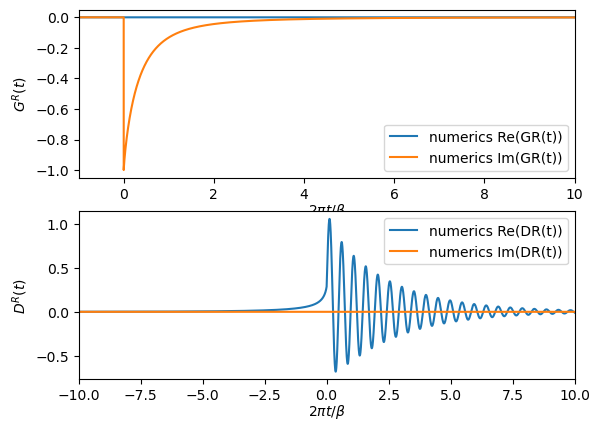

In [7]:
fig, ax = plt.subplots(2)

ax[0].plot(2*np.pi*t/beta, np.real(GRt), label = r'numerics Re(GR(t))')
ax[0].plot(2*np.pi*t/beta, np.imag(GRt), label = r'numerics Im(GR(t))')
#ax[0].plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
#ax[0].set_ylim(-1,1)
ax[0].set_xlim(-1,10)
ax[0].set_xlabel(r'$2\pi t/\beta$',labelpad = 0)
ax[0].set_ylabel(r'${G^R(t)}$')
ax[0].legend()

ax[1].plot(2*np.pi*t/beta, np.real(DRt),'-',label = 'numerics Re(DR(t))')
ax[1].plot(2*np.pi*t/beta, np.imag(DRt), label = 'numerics Im(DR(t))')
#ax[1].plot(tau/beta, np.real(Dconftau), 'b--', label = 'analytical Dtau' )
#ax[1].plot(tau/beta, np.real(FreeDtau), 'g-.', label = 'Free D Dtau' )
#ax[1].set_ylim(0,1)
ax[1].set_xlabel(r'$2\pi t/\beta$',labelpad = 0)
ax[1].set_ylabel(r'${D^R(t)}$')
#ax[1].set_xlim(0,beta/(2*np.pi))
ax[1].set_xlim(-10,10)
ax[1].legend()
# 

(-1.546467372070729e-06+1.2982020909869442e-10j)


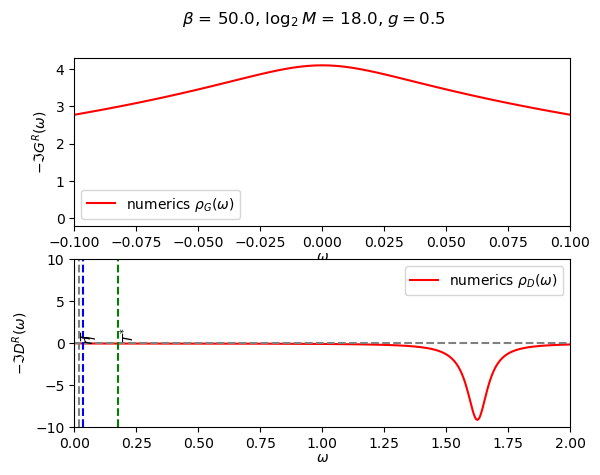

In [5]:
fig, ax = plt.subplots(2)
titlestring = r'$\beta$ = ' + str(beta) + r', $\log_2{M}$ = ' + str(np.log2(M)) + r', $g = $' + str(g)
fig.suptitle(titlestring)

# DRomega = CrazyDconfReal(omega,g,beta,eta)
# GRomega = CrazyGconfReal(omega,g,beta,eta)
# rhoG = -np.imag(GRomega)
# rhoD = -np.imag(DRomega)

ax[0].plot(omega, rhoG, 'r', label = r'numerics $\rho_G(\omega)$')
#ax[0].plot(tau/beta, np.real(Gconftau), 'b--', label = 'analytical Gtau' )
#ax[0].set_ylim(-1,1)
ax[0].set_xlim(-0.1,0.1)
ax[0].set_xlabel(r'$\omega$',labelpad = 0)
ax[0].set_ylabel(r'$-\Im{G^R(\omega)}$')
ax[0].legend()

ax[1].plot(omega, rhoD, 'r', label = r'numerics $\rho_D(\omega)$')
#ax[1].plot(tau/beta, np.real(Dconftau), 'b--', label = 'analytical Dtau' )
#ax[1].plot(tau/beta, np.real(FreeDtau), 'g-.', label = 'Free D Dtau' )
ax[1].set_ylim(-10,10)
#ax[1].plot(omega,rhoD*boseeinstein(beta*omega), label = 'density of states')
ax[1].set_xlabel(r'$\omega$',labelpad = 0)
ax[1].set_ylabel(r'$-\Im{D^R(\omega)}$')
ax[1].set_xlim(0,2)
ax[1].legend()
ax[1].plot(omega, np.zeros_like(omega),ls = '--', c = 'gray')
ax[1].axvline([0], ls = '--', c = 'gray')
ax[1].axvline([1/beta], ls = '--', c = 'gray')
ax[1].axvline([eta], ls = '--', c = 'blue')
ax[1].axvline([Tstar], ls = '--', c = 'green')
ax[1].text(1/beta+0.002,0.6, r'$T$',rotation=90)
ax[1].text(eta+0.001,0.4, r'$\eta$',rotation=90)
ax[1].text(Tstar+0.002,0.4, r'$T^{*}$',rotation=90)

#plt.savefig('KoenraadEmails/label_eta_T_Tstar.pdf')

print(DRomega[-1])

slope of fit = -0.085
2\Delta - 1 =  -0.15925173107191803


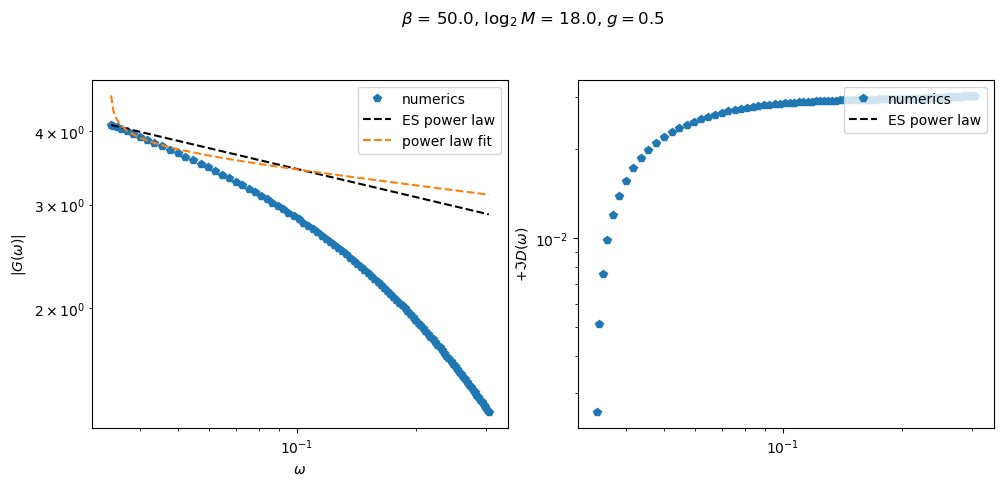

In [6]:
# powD = 1. - 4*Delta
delta = 0.420374134464041
start,stop = M+1, M+100

#eta = 0
fitslice = slice(start+4, start + 10)
functoplot = rhoG
m,c = np.polyfit(np.log(omega[fitslice]), np.log(np.abs(functoplot[fitslice])),1)
print(f'slope of fit = {m:.03f}')


fitG_val = -np.imag(GRomega[start])
# conf_fit_G = 1 * np.abs(omega+1j*eta)**(2*delta - 1)
# conf_fit_G = conf_fit_G/conf_fit_G[start] * fitG_val
conf_fit_G = 1 * np.abs(omega+1j*eta)**(2*delta - 1)
conf_fit_G = conf_fit_G/conf_fit_G[start] * fitG_val


# fitG_val = np.abs(GRomega[start])
# conf_fit_G = 1 * np.abs(omega+1j*eta)**(2*delta - 1)
# conf_fit_G = conf_fit_G/conf_fit_G[start] * fitG_val

fitD_val = -np.imag(DRomega[start])
conf_fit_D = 1 * np.abs(omega[start:stop]+1j*eta)**(1-4*delta)
conf_fit_D = conf_fit_D/conf_fit_D[0] * fitD_val


# fitD_val = np.abs(DRomega[start])
# conf_fit_D = 1 * np.abs(omega[start:stop]+1j*eta)**(1-4*delta)
# conf_fit_D = conf_fit_D/conf_fit_D[0] * fitD_val


# fitD_val = np.abs(DRomega[start])
# conf_fit_D = 1 * np.abs(omega[start:stop]+1j*eta)**(1-4*delta)
# conf_fit_D = conf_fit_D/conf_fit_D[0] * fitD_val

fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
titlestring = r'$\beta$ = ' + str(beta) + r', $\log_2{M}$ = ' + str(np.log2(M)) + r', $g = $' + str(g)
fig.suptitle(titlestring)
fig.tight_layout(pad=2)

ax1.loglog(np.abs(omega[start:stop]+1j*eta), -np.imag(GRomega[start:stop]),'p',label = 'numerics')
#ax1.loglog(np.abs(omega[start:stop]+1j*eta), np.abs(GRomega[start:stop]),'p',label = 'numerics')
ax1.loglog(np.abs(omega[start:stop]+1j*eta), conf_fit_G[start:stop],'k--',label = 'ES power law')
ax1.loglog(np.abs(omega[start:stop]+1j*eta), np.exp(c)*(omega[start:stop])**m, '--', label = 'power law fit')

ax1.set_xlabel(r'$\omega$')
#ax1.set_ylabel(r'$-\,\Im{G(\omega)}$')
ax1.set_ylabel(r'$|G(\omega)|$')
#ax1.set_aspect('equal', adjustable='box')
#ax1.axis('square')
ax1.legend(loc = 'upper right')
#ax1.set_xlim(1e-3,1e-1)

ax2.loglog(np.abs(omega[start:stop]+1j*eta), np.imag(DRomega[start:stop]),'p',label='numerics')
#ax2.loglog(np.abs(omega[start:stop]+1j*eta), np.abs(DRomega[start:stop]),'p',label='numerics')
ax2.loglog(np.abs(omega[start:stop]+1j*eta), conf_fit_D,'k--',label = 'ES power law')

#ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$+\Im{D(\omega)}$',labelpad = None)
#ax2.set_ylabel(r'$|D(\omega)|$',labelpad = None)
#ax2.set_aspect('equal', adjustable='box')
ax2.legend(loc = 'upper right')
#ax2.set_xlim(1e-3,1e-1)

print('2\Delta - 1 = ', 2*delta-1)

In [9]:
len(omega)//2 , M, omega[M]

(262144, 262144, 0.0)